In [12]:
#MNIST DATASET CLASSIFICATION
#This porject shows randomforest classification on MNIST dataset and visualizes the results with matplotlib heatmap.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [13]:
#loading data 
mnist = fetch_openml('mnist_784', version=1)
X,y=  mnist.data, mnist.target
print(X.shape, y.shape)


(70000, 784) (70000,)


In [14]:
#splitting for training and testing
X_train , X_type, y_train, y_type = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_type.shape, y_train.shape, y_type.shape)


(56000, 784) (14000, 784) (56000,) (14000,)


In [15]:
#Training the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [16]:
#Predicting on test data
y_pred = rf.predict(X_type)
accuracy = np.mean(y_pred == y_type)
print(f"Accuracy: {accuracy *100:.2f}%")

Accuracy: 96.73%


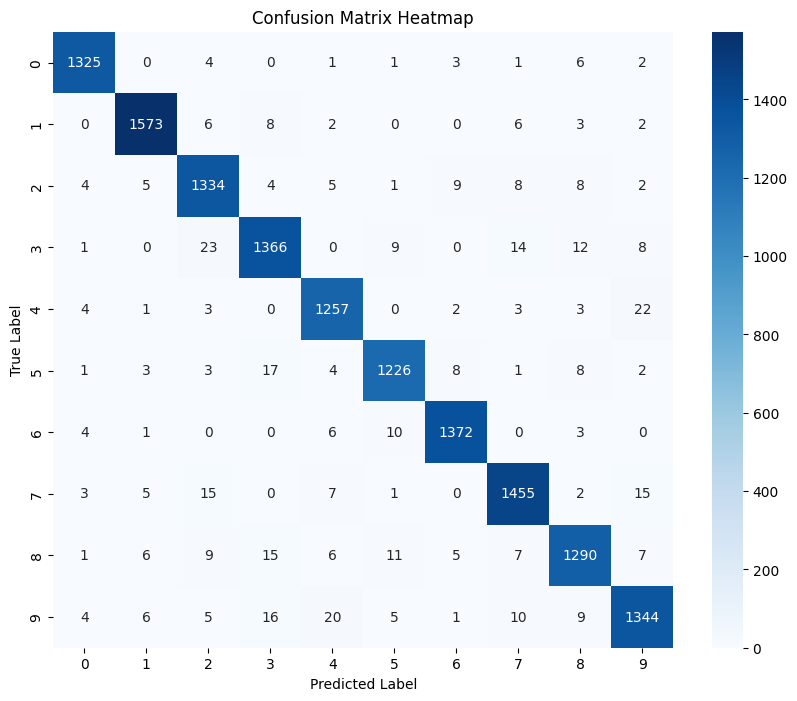

In [17]:
#plotting heatmap
confusion_matrix = np.zeros((10, 10), dtype=int)
for true_label, pred_label in zip(y_type, y_pred):
    confusion_matrix[int(true_label), int(pred_label)] += 1
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:

test_case = int(input("Enter the test case label (0-9): "))
print(f"\nAnalyzing results for test case: {test_case}")

TP, FP, TN, FN = [], [], [], []
for i in range(len(y_type)):
    true = int(y_type.iloc[i])     
    pred = int(y_pred[i])

    if true == test_case and pred == test_case:
        TP.append(i)
    elif true != test_case and pred == test_case:
        FP.append(i)
    elif true == test_case and pred != test_case:
        FN.append(i)
    elif true != test_case and pred != test_case:
        TN.append(i)


print(f"True Positives:  {len(TP)}")
print(f"False Positives: {len(FP)}")
print(f"True Negatives:  {len(TN)}")
print(f"False Negatives: {len(FN)}")



Analyzing results for test case: 7
True Positives:  1455
False Positives: 50
True Negatives:  12447
False Negatives: 48



 True Positives for Digit 7: 1455 cases


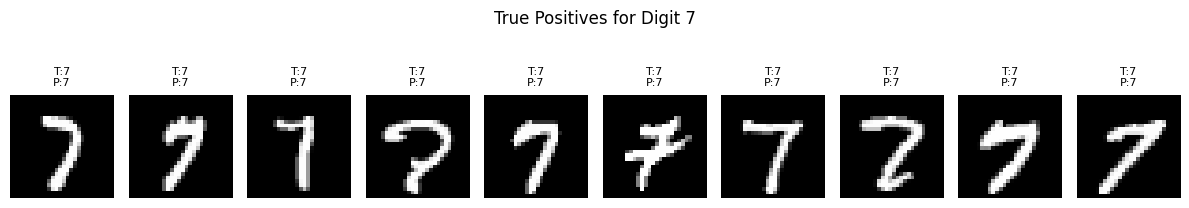


 False Positives for Digit 7: 50 cases


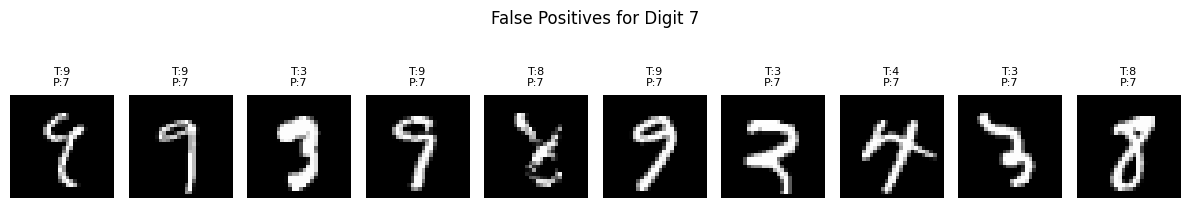


 False Negatives for Digit 7: 48 cases


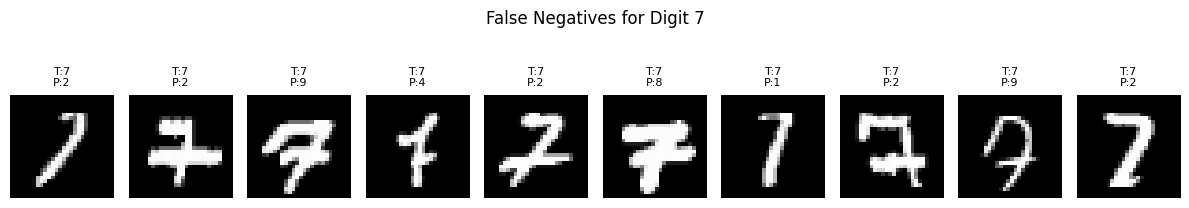


 True Negatives for Digit 7: 12447 cases


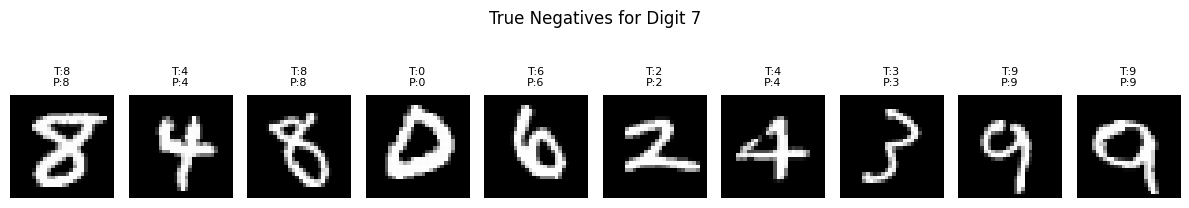

In [ ]:
def plot_cases(indexes, title, y_true, y_pred, X_data):
    print(f"\n {title}: {len(indexes)} cases")
    plt.figure(figsize=(12, 2.5))
    for i, idx in enumerate(indexes[:10]):
        plt.subplot(1, 10, i + 1)

        plt.imshow(X_data[idx].reshape(28, 28), cmap='gray')
        plt.title(f"T:{y_true[idx]}\nP:{y_pred[idx]}", fontsize=8)
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

y_type = np.array(y_type)
y_pred = np.array(y_pred)
X_type = np.array(X_type)
plot_cases(TP, f"True Positives for Digit {test_case}", y_type, y_pred, X_type)
plot_cases(FP, f"False Positives for Digit {test_case}", y_type, y_pred, X_type)
plot_cases(FN, f"False Negatives for Digit {test_case}", y_type, y_pred, X_type)
plot_cases(TN, f"True Negatives for Digit {test_case}", y_type, y_pred, X_type)
